In [1]:
pip install pysoundfile

In [2]:
pip install matplotlib

In [3]:
%matplotlib inline

In [4]:
conda install -c conda-forge librosa

In [5]:
!pip install textblob

In [6]:
import pandas as pad
import numpy as nup
import glob
import soundfile
import os
import sys
import librosa
import librosa.display
import seaborn as sbn 
import matplotlib.pyplot as mplt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Audio
from textblob import TextBlob
import speech_recognition as sr

In [7]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [8]:
os.listdir(path="D:\project\speech-emotion-recognition-ravdess-data")
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = "D:\project\speech-emotion-recognition-ravdess-data"
listOfFiles = getListOfFiles(dirName)

In [9]:
r=sr.Recognizer()
for file in range(0 ,3):
    print()
    with sr.AudioFile(listOfFiles[file]) as source:   
        print(listOfFiles[file])
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')


D:\project\speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-01-01-01.wav
error

D:\project\speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-01-02-01.wav
can you talking by the door

D:\project\speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-02-01-01.wav
talk to sitting by the door


In [10]:
RavdessData = "D:\project\speech-emotion-recognition-ravdess-data"

In [11]:
ravdessDirectoryList = os.listdir(RavdessData)
file_emotion = []
file_path = []
for dir in ravdessDirectoryList:
    actor_path = os.path.join(RavdessData, dir)
    if os.path.isdir(actor_path):
        actor_files = os.listdir(actor_path)
        for file in actor_files:
            file_p = os.path.join(actor_path, file)
            if os.path.isfile(file_p):
                part = file.split('.')[0]
                part = part.split('-')
                file_emotion.append(int(part[2]))
                file_path.append(file_p)
emotion_df = pad.DataFrame(file_emotion, columns=['Emotions'])
path_df = pad.DataFrame(file_path, columns=['Path'])
Ravdess_df = pad.concat([emotion_df, path_df], axis=1)
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

In [12]:
dataPath=pad.concat([Ravdess_df], axis=0) 
dataPath.to_csv("data_path.csv", index=False)
dataPath.head()

,Emotions,Path
0,neutral,D:\project\speech-emotion-recognition-ravdess-...
1,neutral,D:\project\speech-emotion-recognition-ravdess-...
2,neutral,D:\project\speech-emotion-recognition-ravdess-...
3,neutral,D:\project\speech-emotion-recognition-ravdess-...
4,calm,D:\project\speech-emotion-recognition-ravdess-...


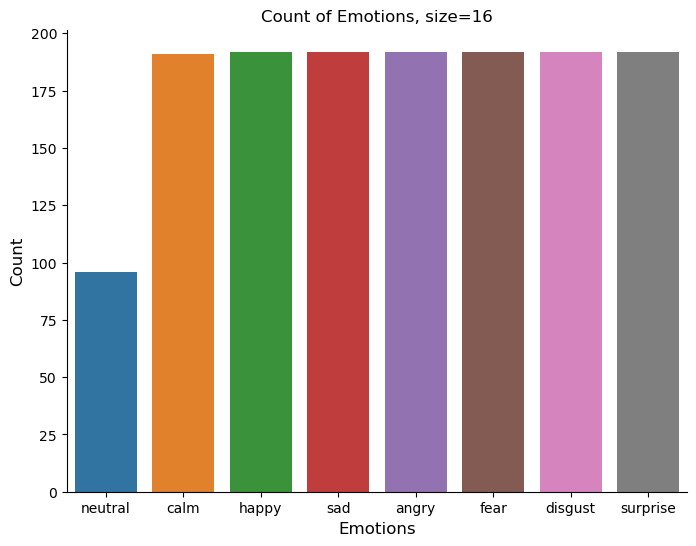

In [13]:
mplt.figure(figsize=(8, 6)) 
mplt.title('Count of Emotions, size=16')
sbn.countplot(data=dataPath,x='Emotions')

mplt.ylabel('Count', size=12)

mplt.xlabel('Emotions', size=12)

sbn.despine(top=True, right=True, left=False, bottom=False)

mplt.show()

In [14]:
def createWaveplot(data, sr, e):
    mplt.figure(figsize=(10, 3)) 
    mplt.title('Waveplot for audio with {} emotion'.format(e), size=15) 
    librosa.display.waveshow(data, sr=sr)
    mplt.show()

In [15]:
def createSpectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    mplt.figure(figsize=(12, 3))
    mplt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    mplt.colorbar()

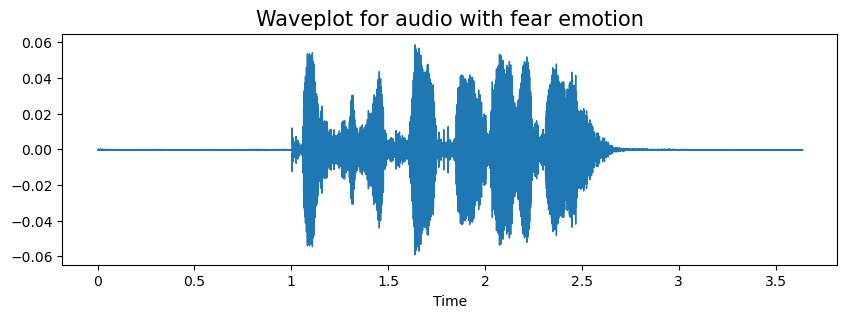

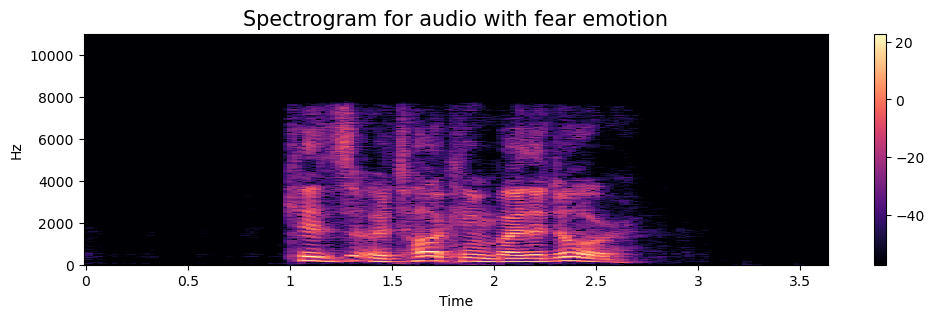

In [16]:
emotion = 'fear'

path = nup.array(dataPath.Path[dataPath.Emotions == emotion])[1]

data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

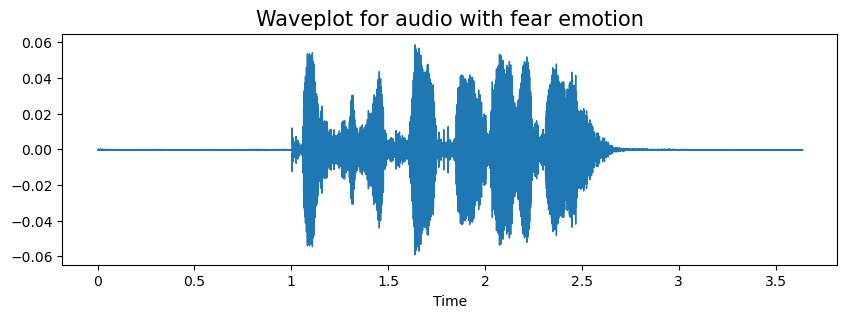

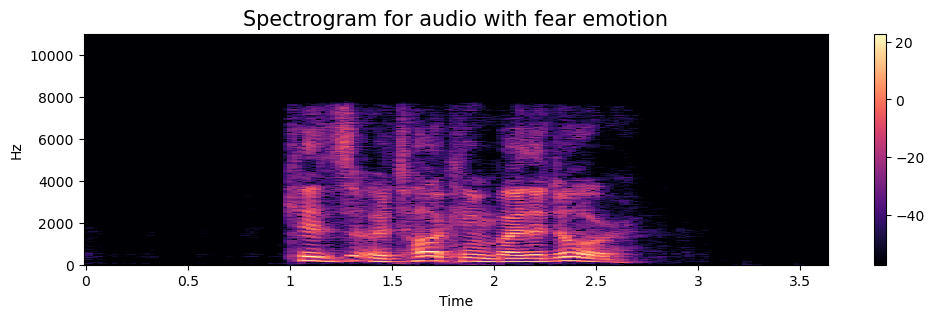

In [17]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

def createWaveplot(data, sr, e):
    plt.figure(figsize=(10, 3)) 
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15) 
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def createSpectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

emotion = 'fear'

path = np.array(dataPath.Path[dataPath.Emotions == emotion])[1]

data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

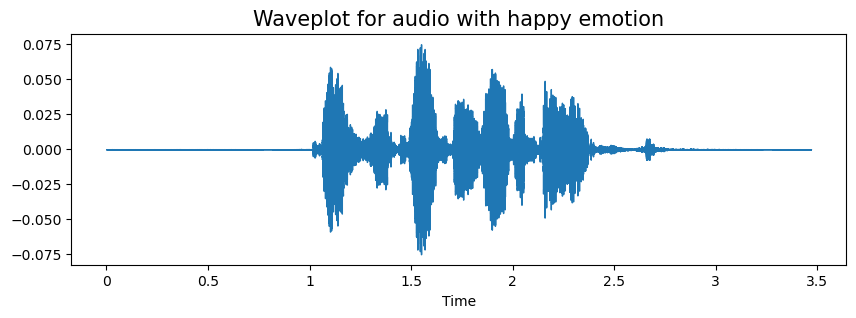

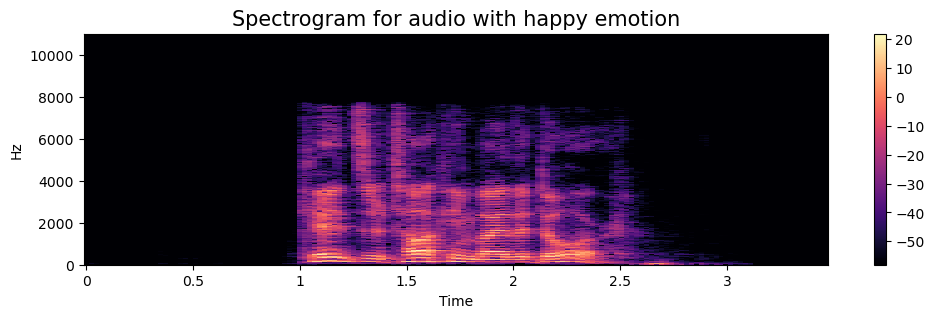

In [18]:
emotion='happy'

path = nup.array(dataPath.Path[dataPath. Emotions==emotion])[1]

data, samplingRate= librosa.load(path)

createWaveplot(data, samplingRate, emotion)

createSpectrogram (data, samplingRate, emotion)

Audio(path)

In [19]:
def noise(data):
    noiseAmp = 0.035*nup.random. uniform()*nup.amax(data) 
    data = data + noiseAmp*nup.random.normal(size=data.shape[0]) 
    return data

def stretch (data, rate=0.8):
    return librosa.effects.time_stretch (data, rate)

def shift(data):

    shiftRange = int(nup.random.uniform (low=-5, high= 5) *1000)
    return nup.roll (data, shiftRange)


def pitch (data, samplingRate, pitchFactor=0.7): 
    return librosa.effects. pitch_shift(data, samplingRate, pitchFactor)

In [20]:
path = nup.array(dataPath.Path)[1]

data,sampleRate= librosa.load(path)

In [21]:
# x = noise (data)

# mplt.figure(figsize=(14,4))

# librosa.display.waveplot (y=x, sr=sampleRate) 
# Audio(x, rate=sampleRate)

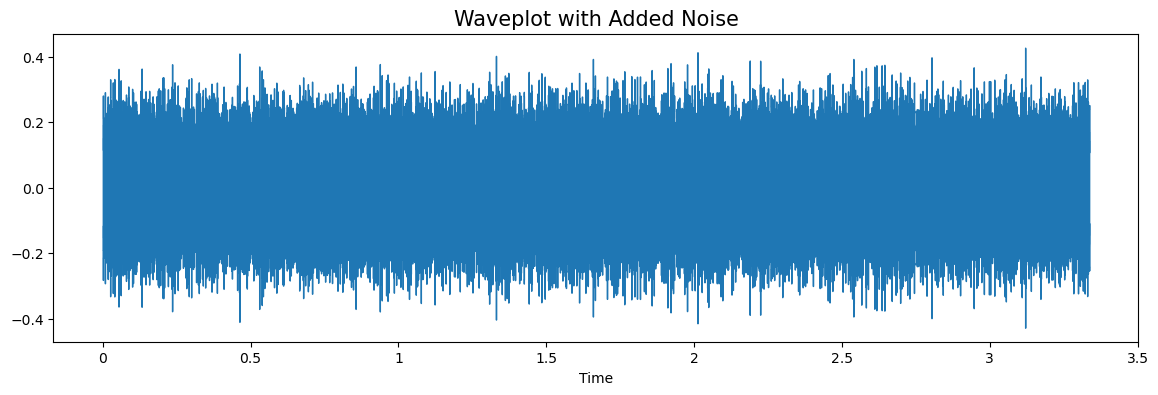

In [22]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Assuming 'data' and 'sampleRate' are properly defined

# Generate Gaussian noise with the same length as the audio signal 'data'
noise = np.random.normal(0, 0.1, len(data))  # Mean=0, Standard Deviation=0.1

# Add the generated noise to the audio signal
data_with_noise = data + noise

# Plot the waveplot of the noisy audio
plt.figure(figsize=(14, 4))
plt.title('Waveplot with Added Noise', size=15)
librosa.display.waveshow(y=data_with_noise, sr=sampleRate)
plt.show()

# Play the audio with added noise
Audio(data_with_noise, rate=sampleRate)


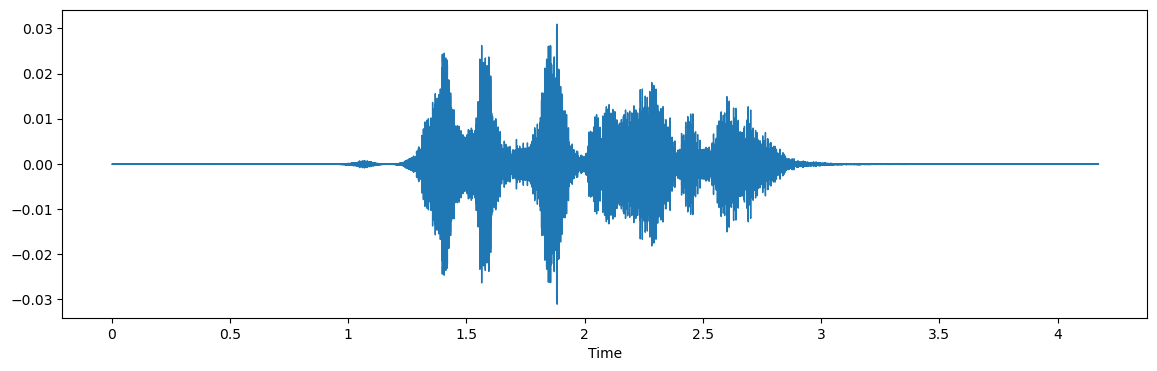

In [23]:
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
x = stretch(data)
plt.figure(figsize=(14, 4)) 
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

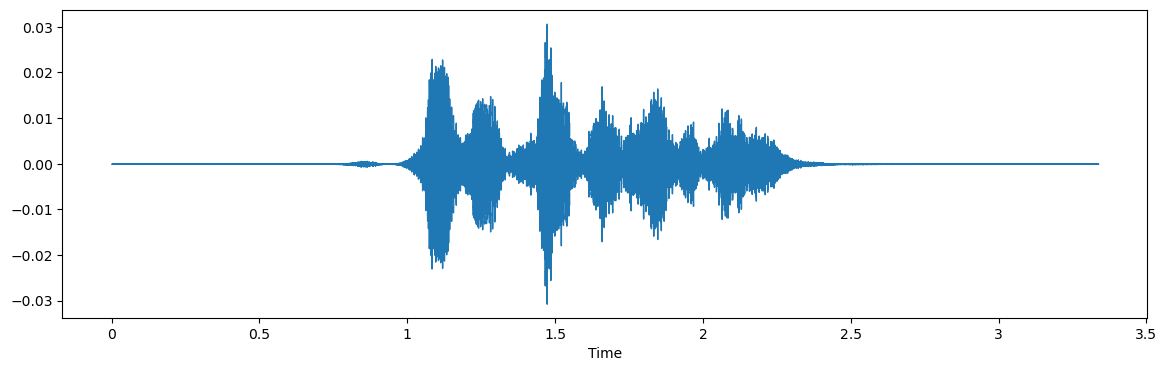

In [24]:
def shift(data, n_steps=2):
    return librosa.effects.pitch_shift(data, sr=sampleRate, n_steps=n_steps)
x = shift(data)
plt.figure(figsize=(14, 4)) 
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

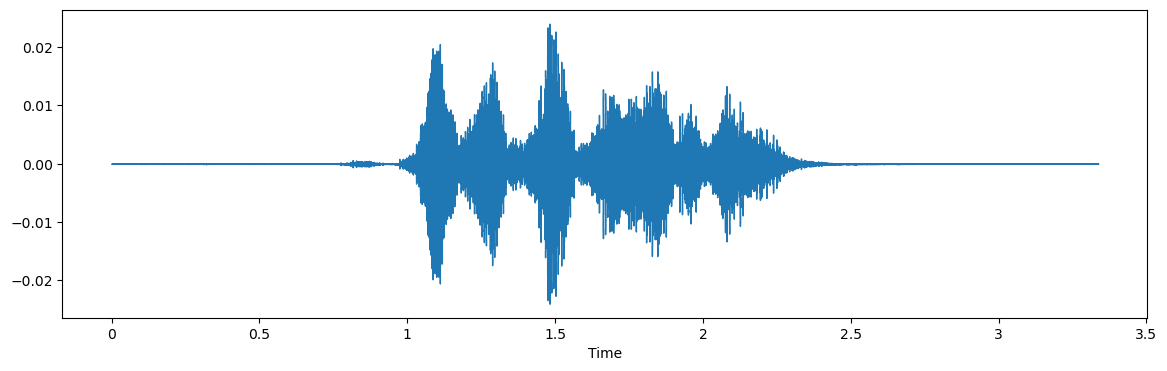

In [25]:
def pitch(data, samplingRate, pitchFactor=0.7): 
    return librosa.effects.pitch_shift(data, sr=samplingRate, n_steps=pitchFactor)

# Assuming 'data' and 'sampleRate' are defined elsewhere in your code

x = pitch(data, sampleRate)
plt.figure(figsize=(14, 4)) 
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

In [26]:
def extractFeature(fileName, mfcc, chroma, mel):
    with soundfile.SoundFile(fileName) as soundFile:
        X = soundFile.read(dtype="float32")
        sampleRate = soundFile.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sampleRate, n_mfcc=48).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampleRate).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sampleRate).T, axis=0)
            result = np.hstack((result, mel))
    return result

In [27]:
emotions={

'01': 'neutral',

'02':'calm',

'03':'happy',

'04':'sad',

'05':'angry',

'06':'fearful',

'07':'disgust',

'08':'surprised'
}
observedEmotions=['calm', 'happy', 'disgust']

In [28]:
def loadData(test_size=0.2):
    x, y = [], []
    for file in glob.glob("D:\\project\\speech-emotion-recognition-ravdess-data\\**\\*"):
        fileName = os.path.basename(file)
        split_filename = fileName.split("-")
        
        # Check if there are enough elements after the split
        if len(split_filename) < 3:
            print(f"Skipping file {fileName} due to insufficient elements in filename")
            continue
        
        emotion_key = split_filename[2]
        
        try:
            emotion1 = emotions[emotion_key]
        except KeyError:
            print(f"Skipping file {fileName} due to unknown emotion key: {emotion_key}")
            continue
        
        print(f"File: {fileName}, Emotion: {emotion1}")
        
        if emotion1 not in observedEmotions:
            print(f"Skipping file {fileName} due to emotion {emotion1}")
            continue
        
        feature = extractFeature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion1)
    
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)


In [29]:
xTrain, xTest, yTrain, yTest = loadData(test_size=0.23)
print(xTest,yTest)

File: 03-01-01-01-01-01-01.wav, Emotion: neutral
Skipping file 03-01-01-01-01-01-01.wav due to emotion neutral
File: 03-01-01-01-01-02-01.wav, Emotion: neutral
Skipping file 03-01-01-01-01-02-01.wav due to emotion neutral
File: 03-01-01-01-02-01-01.wav, Emotion: neutral
Skipping file 03-01-01-01-02-01-01.wav due to emotion neutral
File: 03-01-01-01-02-02-01.wav, Emotion: neutral
Skipping file 03-01-01-01-02-02-01.wav due to emotion neutral
File: 03-01-02-01-01-02-01.wav, Emotion: calm
File: 03-01-02-01-02-01-01.wav, Emotion: calm
File: 03-01-02-01-02-02-01.wav, Emotion: calm
File: 03-01-02-02-01-01-01.wav, Emotion: calm
File: 03-01-02-02-01-02-01.wav, Emotion: calm
File: 03-01-02-02-02-01-01.wav, Emotion: calm
File: 03-01-02-02-02-02-01.wav, Emotion: calm
File: 03-01-03-01-01-01-01.wav, Emotion: happy
File: 03-01-03-01-01-02-01.wav, Emotion: happy
File: 03-01-03-01-02-01-01.wav, Emotion: happy
File: 03-01-03-01-02-02-01.wav, Emotion: happy
File: 03-01-03-02-01-01-01.wav, Emotion: happy

In [30]:
print((xTrain.shape[0], xTest.shape[0]))

(442, 133)


In [31]:
print(f'Features extracted: {xTrain.shape[1]}')

Features extracted: 188


In [32]:
#Initialize the Multiplayer-Perceptron Classifier
model = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive',max_iter=500)
#model=MLPClassifier()

In [33]:
#Training the model
model.fit(xTrain,yTrain)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [34]:
#Predicting for the test set
expected_Of_y = yTest
yPred=model.predict(xTest)

In [35]:
print(metrics.confusion_matrix(expected_Of_y, yPred))

[[40  2  0]
 [ 5 35  8]
 [ 3  8 32]]


In [36]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

        calm       0.83      0.95      0.89        42
     disgust       0.78      0.73      0.75        48
       happy       0.80      0.74      0.77        43

    accuracy                           0.80       133
   macro avg       0.80      0.81      0.80       133
weighted avg       0.80      0.80      0.80       133



In [37]:
accuracy=accuracy_score(y_true=yTest, y_pred=yPred)
print("Accuracy: {:2f}%".format(accuracy*100))

Accuracy: 80.451128%


In [38]:
r=sr.Recognizer()
with sr.AudioFile('D:\\project\\speech-emotion-recognition-ravdess-data\\Actor_01\\03-01-01-01-01-02-01.wav') as source:
        audio = r.listen(source)
        print(audio)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

can you talking by the door


In [40]:
print("text:",text)
blob = TextBlob(text)
sentiment = blob.sentiment.polarity
print(sentiment)
if sentiment == 0:
    print("Neutral")
elif sentiment == 1:
    print("happy")
elif sentiment <=0.3 and sentiment >=0.1:
    print("calm")
elif sentiment <= -0.5 and sentiment >= -1:
    print("sad")
elif sentiment >= -1 and sentiment <=-0.7:
    print("angry")
elif sentiment <= -0.3 and sentiment >=-0.7:
    print("fearful")
elif sentiment <= -0.7 and sentiment >=-1:
    print("disgust")
elif np.round(sentiment)==0 :
    print("surprised")

text: can you talking by the door
0.0
Neutral
